In [1]:
import numpy as np 
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [349]:
# Inverting dictionaries to map index -> Diagnosiscode
females_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/females_binary.types')
females_binary_types_inv = {v: k for k, v in females_types.items()}
male_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/males_binary.types')
male_binary_types_inv = {v: k for k, v in males_types.items()}
mixed_binary_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.types')
mixed_binary_types_inv = {v: k for k, v in mixed_types.items()}

females_count_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/females_count.types')
females_count_types_inv = {v: k for k, v in females_types.items()}
male_count_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/males_count.types')
male_count_types_inv = {v: k for k, v in males_types.items()}
mixed_count_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_count.types')
mixed_count_types_inv = {v: k for k, v in mixed_types.items()}

In [339]:
mixed_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_count.npy')
mixed_count = np.rint(mixed_count)
print(mixed_count.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
mixed_count_icd = np.chararray(mixed_count.shape, itemsize=7)            
it = np.nditer(mixed_count, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): mixed_count_icd[it.multi_index] = mixed_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save mixed patients to csv
pd.DataFrame(mixed_count_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_count.csv")

(10000, 906)


In [340]:
# Binary
mixed_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.csv')
male_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_binary.csv')
female_binary = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_binary.csv')

# Count
mixed_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_count.csv')
#male_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_count.csv')
#female_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_count.csv')

/Users/nicenoize/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,18,56,124,132,134,158,160,161,171,183,192,196,203,212,219,235,238,239,241,244,251,258,274,276,282,283,284,286,298,301,305,320,326,328,335,342,345,355,358,363,368,372,375,378,381,384,386,390,393,408,418,421,424,430,432,433,440,442,443,444,456,461,463,464,466,469,471,472,475,476,478,479,484,485,489,490,492,498,500,504,519,522,534,536,554,567,577,582,584,591,615,634,663,699,705,706,769) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nicenoize/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19,57,125,133,135,159,161,162,172,184,193,197,204,213,220,236,239,240,242,245,252,259,275,277,283,284,285,287,299,302,306,321,327,329,336,343,346,356,359,364,369,373,376,379,382,385,387,391,394,409,419,422,425,431,433,434,441,443,444,

In [260]:
# Invert
#males = males.T
#females = females.T
#mixed = mixed.T

In [261]:
#for i in range(855):
#    females.rename(columns={ females.columns[i]: "DIAGNOSIS_ICD" }, inplace = True)
#females.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)
#males.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)

#females.head()

In [342]:
# Binary
mixed_binary.rename(columns={mixed_binary.columns[0]: "SUBJECT_ID"}, inplace = True)
male_binary.rename(columns={male_binary.columns[0]: "SUBJECT_ID"}, inplace = True)
female_binary.rename(columns={female_binary.columns[0]: "SUBJECT_ID"}, inplace = True)

# Count
mixed_count.rename(columns={mixed_count.columns[0]: "SUBJECT_ID"}, inplace = True)
#male_count.rename(columns={male_count.columns[0]: "SUBJECT_ID"}, inplace = True)
#females_count.rename(columns={female_count.columns[0]: "SUBJECT_ID"}, inplace = True)

In [343]:
# Binary
mixed_binary = pd.melt(mixed_binary, id_vars=["SUBJECT_ID"])
male_binary = pd.melt(male_binary, id_vars=["SUBJECT_ID"])
female_binary = pd.melt(female_binary, id_vars=["SUBJECT_ID"])

# Count
mixed_count = pd.melt(mixed_count, id_vars=["SUBJECT_ID"])
#male_transformed_count = pd.melt(male_count, id_vars=["SUBJECT_ID"])
#female_transformed_count = pd.melt(female_count, id_vars=["SUBJECT_ID"])

In [344]:
# Find patient by SUBJECT_ID
#print(females_transformed.loc[females_transformed['SUBJECT_ID'] == 3])

In [350]:
# Sort rows by SUBJECT ID
mixed_binary = mixed_binary.sort_values(by=['SUBJECT_ID'], ascending = True)
male_binary = male_binary.sort_values(by=['SUBJECT_ID'], ascending = True)
female_binary = female_binary.sort_values(by=['SUBJECT_ID'], ascending = True)
mixed_count = mixed_count.sort_values(by=['SUBJECT_ID'], ascending = True)
#male_count = male_count.sort_values(by=['SUBJECT_ID'], ascending = True)
#female_count = female_count.sort_values(by=['SUBJECT_ID'], ascending = True)

# Drop NaN rows
mixed_binary_icd = mixed_binary.dropna()
male_binary_icd = male_binary.dropna()
female_binary_icd = female_binary.dropna()
mixed_count_icd = mixed_count.dropna()
#male_count_icd = male_count.dropna()
#female_count_icd = female_count.dropna()

In [293]:
# Filter mixed patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
mixed_ischemic = mixed_binary_icd[mixed_binary_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
mixed_heart_disease = mixed_binary_icd[mixed_binary_icd.value.str.contains("b'D_429", regex=True, na=False)]
mixed_diabetes = mixed_binary_icd[mixed_binary_icd.value.str.contains("^b'D_25", na=False)]
mixed_ischemic_ids = mixed_ischemic["SUBJECT_ID"].tolist()
mixed_heart_disease_ids = mixed_heart_disease["SUBJECT_ID"].tolist()
mixed_diabetes_ids = mixed_diabetes["SUBJECT_ID"].tolist()

In [294]:
# Filter female patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
females_ischemic = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
females_heart_disease = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("b'D_429", regex=True, na=False)]
females_diabetes = female_diagnoses_icd[female_diagnoses_icd.value.str.contains("^b'D_25", na=False)]
females_ischemic_ids = females_ischemic["SUBJECT_ID"].tolist()
females_heart_disease_ids = females_heart_disease["SUBJECT_ID"].tolist()
females_diabetes_ids = females_diabetes["SUBJECT_ID"].tolist()

In [295]:
# Filter male patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
males_ischemic = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
males_heart_disease = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("b'D_429", regex=True, na=False)]
males_diabetes = male_diagnoses_icd[male_diagnoses_icd.value.str.contains("^b'D_25", na=False)]
males_ischemic_ids = males_ischemic["SUBJECT_ID"].tolist()
males_heart_disease_ids = males_heart_disease["SUBJECT_ID"].tolist()
males_diabetes_ids = males_diabetes["SUBJECT_ID"].tolist()

In [335]:
# get top 10 most ICD9-Codes for mixed patients
n = 20
mixed_diagnoses_top10 = mixed_diagnoses_icd['value'].value_counts()[:n]
print(mixed_diagnoses_top10)

b''         8951914
b'D_01'        3612
b'D_72'        3089
b'D_76'        2691
b'D_140'       2620
b'D_85'        2618
b'D_84'        2391
b'D_28'        2102
b'D_188'       2055
b'D_273'       2050
b'D_05'        1990
b'D_8'         1611
b'D_1'         1469
b'D_74'        1412
b'D_300'       1382
b'D_29'        1373
b'D_500'       1317
b'D_039'       1271
b'D_18'        1206
b'D_24'        1173
Name: value, dtype: int64


In [301]:
# get top 10 most ICD9-Codes for male patients
n = 20
males_ischemic_top10 = males_diagnoses_icd['value'].value_counts()[:n]
print(males_ischemic_top10)

b'D_01'     2395
b'D_72'     1798
b'D_500'    1203
b'D_273'     948
b'D_11'      836
b'D_85'      805
b'D_1'       627
b'D_458'     626
b'D_76'      592
b'D_28'      461
b'D_74'      447
b'D_84'      432
b'D_97'      413
b'D_104'     403
b'D_308'     361
b'D_188'     353
b'D_158'     349
b'D_8'       319
b'D_9'       314
b'D_039'     286
Name: value, dtype: int64


In [300]:
# get top 10 most ICD9-Codes for female patients
n = 20
females_ischemic_top10 = females_diagnoses_icd['value'].value_counts()[:n]
print(females_ischemic_top10)

b'D_01'     4473
b'D_67'     3003
b'D_962'    2792
b'D_83'     2783
b'D_640'    2735
b'D_76'     2370
b'D_101'    2289
b'D_140'    1962
b'D_89'     1944
b'D_82'     1830
b'D_74'     1670
b'D_966'    1506
b'D_651'    1454
b'D_41'     1351
b'D_522'    1349
b'D_55'     1243
b'D_48'     1216
b'D_57'     1199
b'D_64'     1190
b'D_69'     1190
Name: value, dtype: int64


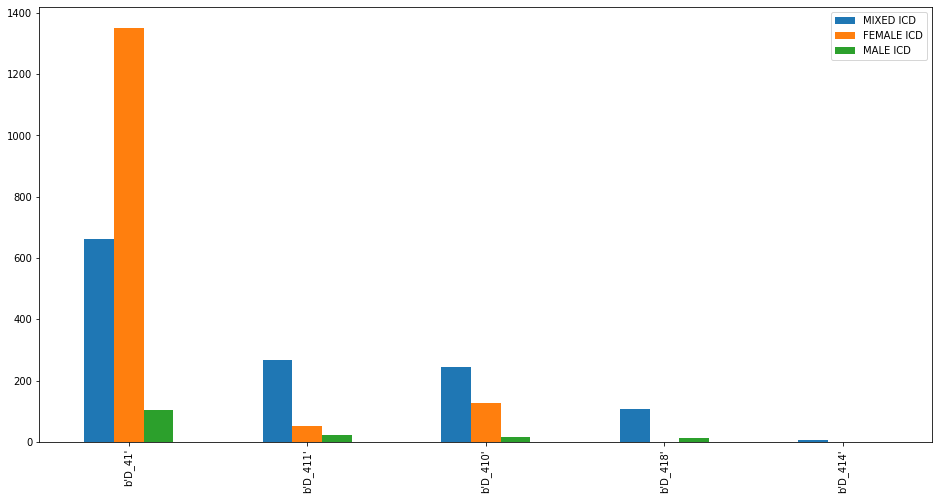

In [282]:
# Compare top n ICD9-Codes occurences for ischemic diseases
n = 50

graph_df = mixed_ischemic['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_ischemic['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_ischemic['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

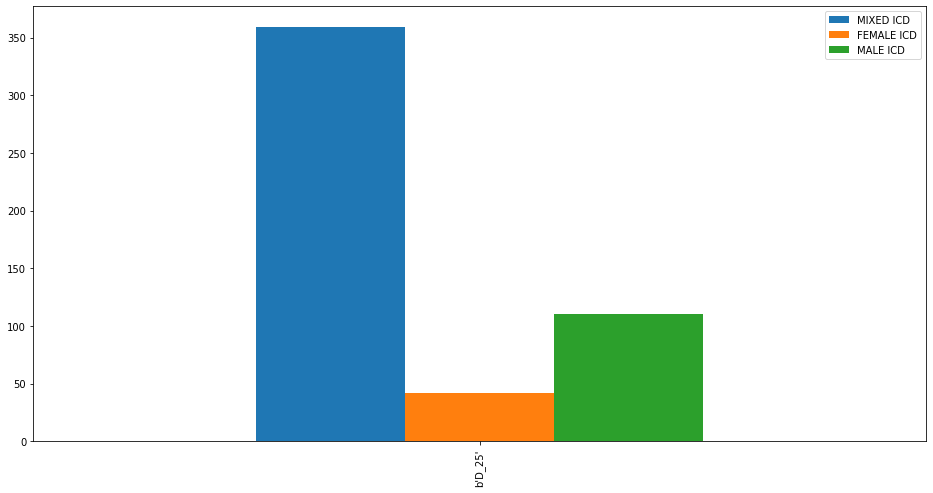

In [244]:
# Compare top n ICD9-Codes occurences for diabetic diseases
n = 50

graph_df = mixed_diabetes['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_diabetes['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_diabetes['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [336]:
# Get ids of mixed patients with heart disease + any type of diabetes
mixed_heart_and_diabetes = mixed_diagnoses_icd[mixed_diagnoses_icd["SUBJECT_ID"].isin(mixed_ischemic_ids)]
mixed_heart_and_diabetes = mixed_heart_and_diabetes[mixed_heart_and_diabetes ["SUBJECT_ID"].isin(mixed_diabetes_ids)]
mixed_heart_and_diabetes["SUBJECT_ID"].nunique() 

220

In [337]:
# Get ids of male patients with heart disease + any type of diabetes
males_heart_and_diabetes = males_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_ischemic_ids)]
males_heart_and_diabetes = males_heart_and_diabetes[male_heart_and_diabetes ["SUBJECT_ID"].isin(males_diabetes_ids)]
males_heart_and_diabetes["SUBJECT_ID"].nunique() 

/Users/nicenoize/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nicenoize/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1

In [338]:
# Get ids of female patients with heart disease + any type of diabetes
females_heart_and_diabetes = females_diagnoses_icd[females_diagnoses_icd["SUBJECT_ID"].isin(females_ischemic_ids)]
females_heart_and_diabetes = females_heart_and_diabetes[females_heart_and_diabetes ["SUBJECT_ID"].isin(females_diabetes_ids)]
females_heart_and_diabetes["SUBJECT_ID"].nunique() 

41

In [277]:
mixed_transformed.shape

(9060000, 3)